In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split,TimeSeriesSplit,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from xgboost import XGBRegressor

from tensorflow import keras
from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential



In [65]:
data = pd.read_csv('Google_Stock_Price_Train.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [66]:
data = data['Open'].values
data

array([325.25, 331.27, 329.83, ..., 793.7 , 783.33, 782.75])

In [67]:
data = data.reshape(-1,1)
data

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [68]:
train = data[:data.shape[0]-50]
test = data[len(train):]

In [69]:
scaller = MinMaxScaler()
train_scaled = scaller.fit_transform(train)

In [70]:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps,train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

In [71]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape

(1158, 50)

In [72]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_train.shape

(1158, 50, 1)

In [114]:
model = Sequential()
model.add(LSTM(10,activation='tanh',input_shape=(50,1),return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [115]:
model.fit(X_train,y_train,batch_size=1,epochs=50)

Epoch 1/50
1158/1158 [==============================] - 9s 7ms/step - loss: 0.0043
Epoch 2/50
1158/1158 [==============================] - 8s 7ms/step - loss: 8.8033e-04
Epoch 3/50
1158/1158 [==============================] - 8s 7ms/step - loss: 6.7722e-04
Epoch 4/50
1158/1158 [==============================] - 8s 7ms/step - loss: 6.3939e-04
Epoch 5/50
1158/1158 [==============================] - 8s 7ms/step - loss: 5.4204e-04
Epoch 6/50
1158/1158 [==============================] - 8s 7ms/step - loss: 5.0358e-04
Epoch 7/50
1158/1158 [==============================] - 8s 7ms/step - loss: 4.5117e-04
Epoch 8/50
1158/1158 [==============================] - 8s 6ms/step - loss: 4.6159e-04
Epoch 9/50
1158/1158 [==============================] - 8s 7ms/step - loss: 4.0945e-04
Epoch 10/50
1158/1158 [==============================] - 8s 7ms/step - loss: 3.6186e-04
Epoch 11/50
1158/1158 [==============================] - 8s 7ms/step - loss: 3.7693e-04
Epoch 12/50
1158/1158 [======================

In [116]:
X_test = data[len(data)-len(test)-timesteps:]
X_test_scalled = scaller.transform(X_test)

In [117]:
X_final = []
for i in range(timesteps,X_test_scalled.shape[0]):
    X_final.append(X_test_scalled[i-timesteps:i,0])

In [118]:
X_final = np.array(X_final)
X_final.shape

(50, 50)

In [119]:
X_final = X_final.reshape(X_final.shape[0],X_final.shape[1],1)

In [120]:
X_final.shape

(50, 50, 1)

In [121]:
predict = model.predict(X_final)
normal = scaller.inverse_transform(predict)

2/2 [==============================] - 0s 4ms/step


In [122]:
r2_score(test,normal)

0.5903151576492057

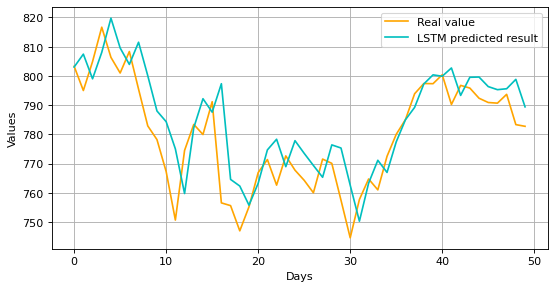

In [124]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(normal,color="c",label="LSTM predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [125]:
model2 = Sequential()
model2.add(LSTM(10,activation='tanh',input_shape=(50,1),return_sequences=False))
model2.add(Dense(1))
model2.compile(optimizer='adam',loss='mean_squared_error')

In [126]:
model2.fit(X_train,y_train,batch_size=4,epochs=200)

Epoch 1/200
290/290 [==============================] - 5s 11ms/step - loss: 0.0076
Epoch 2/200
290/290 [==============================] - 3s 11ms/step - loss: 0.0010
Epoch 3/200
290/290 [==============================] - 3s 11ms/step - loss: 8.7114e-04
Epoch 4/200
290/290 [==============================] - 3s 11ms/step - loss: 8.2528e-04
Epoch 5/200
290/290 [==============================] - 3s 11ms/step - loss: 7.1572e-04
Epoch 6/200
290/290 [==============================] - 3s 11ms/step - loss: 6.9900e-04
Epoch 7/200
290/290 [==============================] - 3s 10ms/step - loss: 6.2652e-04
Epoch 8/200
290/290 [==============================] - 3s 11ms/step - loss: 6.0311e-04
Epoch 9/200
290/290 [==============================] - 3s 11ms/step - loss: 5.8084e-04
Epoch 10/200
290/290 [==============================] - 3s 12ms/step - loss: 5.3561e-04
Epoch 11/200
290/290 [==============================] - 3s 11ms/step - loss: 5.1032e-04
Epoch 12/200
290/290 [===========================

290/290 [==============================] - 3s 10ms/step - loss: 2.9150e-04
Epoch 95/200
290/290 [==============================] - 3s 10ms/step - loss: 2.9612e-04
Epoch 96/200
290/290 [==============================] - 3s 10ms/step - loss: 2.8996e-04
Epoch 97/200
290/290 [==============================] - 3s 10ms/step - loss: 2.8701e-04
Epoch 98/200
290/290 [==============================] - 3s 10ms/step - loss: 2.8491e-04
Epoch 99/200
290/290 [==============================] - 3s 10ms/step - loss: 2.9012e-04
Epoch 100/200
290/290 [==============================] - 3s 10ms/step - loss: 2.8603e-04
Epoch 101/200
290/290 [==============================] - 3s 10ms/step - loss: 2.8098e-04
Epoch 102/200
290/290 [==============================] - 3s 10ms/step - loss: 2.8945e-04
Epoch 103/200
290/290 [==============================] - 3s 10ms/step - loss: 2.8984e-04
Epoch 104/200
290/290 [==============================] - 3s 10ms/step - loss: 2.9050e-04
Epoch 105/200
290/290 [=================

290/290 [==============================] - 3s 11ms/step - loss: 2.8716e-04
Epoch 187/200
290/290 [==============================] - 3s 11ms/step - loss: 2.8904e-04
Epoch 188/200
290/290 [==============================] - 3s 11ms/step - loss: 2.8637e-04
Epoch 189/200
290/290 [==============================] - 3s 11ms/step - loss: 2.8109e-04
Epoch 190/200
290/290 [==============================] - 3s 11ms/step - loss: 2.8585e-04
Epoch 191/200
290/290 [==============================] - 3s 11ms/step - loss: 2.8331e-04
Epoch 192/200
290/290 [==============================] - 3s 11ms/step - loss: 2.7012e-04
Epoch 193/200
290/290 [==============================] - 3s 11ms/step - loss: 2.8228e-04
Epoch 194/200
290/290 [==============================] - 3s 12ms/step - loss: 2.9024e-04
Epoch 195/200
290/290 [==============================] - 3s 11ms/step - loss: 2.8801e-04
Epoch 196/200
290/290 [==============================] - 3s 11ms/step - loss: 2.8212e-04
Epoch 197/200
290/290 [============

In [128]:
predict2 = model2.predict(X_final)
normal2 = scaller.inverse_transform(predict2)

2/2 [==============================] - 0s 3ms/step


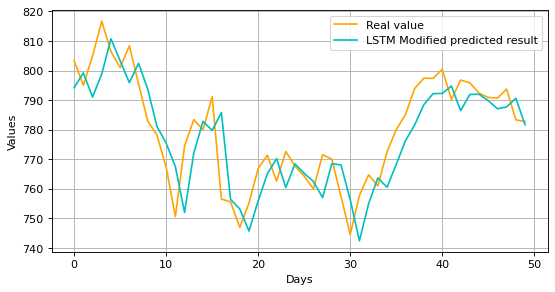

In [129]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(normal2,color="c",label="LSTM Modified predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

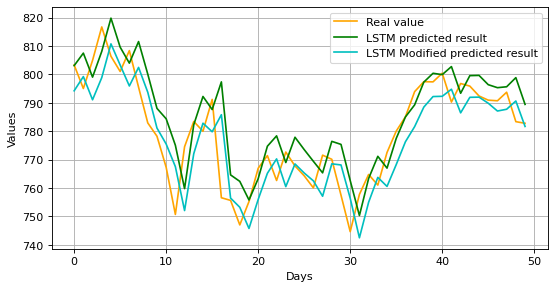

In [130]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(normal,color="green",label="LSTM predicted result")
plt.plot(normal2,color="c",label="LSTM Modified predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [132]:
r2_score(test,normal2)

0.6746876952642713

In [133]:
t = pd.read_csv("Google_Stock_Price_Test.csv")
t.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [134]:
tt = t['Open'].values
tt.shape

(20,)

In [135]:
tt =tt.reshape(-1,1)
tt.shape

(20, 1)

In [136]:
ts = scaller.transform(tt)
ts

array([[0.96257127],
       [0.98096779],
       [0.97657574],
       [0.99425952],
       [1.01571891],
       [1.01853136],
       [1.01302204],
       [1.0171444 ],
       [1.01779935],
       [1.01702882],
       [1.01458237],
       [1.0132532 ],
       [1.01670134],
       [1.0173563 ],
       [1.04634767],
       [1.06044845],
       [1.07622515],
       [1.07025351],
       [1.03163045],
       [0.99734166]])

In [ ]:
tf = []
for i in range(ts.shape[0],timesteps):
    tf.append(tf[])